<h1> TRABALHO PRATICO INTEGRADOR </h1>

<h2> Taxa de rotatividade em telecomunicação </h2>

<h4> 1. Limpeza dos dados</h4>

<h5> 1.1 Importação</h5>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, HalvingGridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

import pycaret
pycaret.__version__
from pycaret.classification import *

In [2]:
# Importando os dados

df = pd.read_csv('../data/data.csv')

# Removendo coluna ID para evitar redundancia 

df = df.drop(['id'], axis = 1)
df

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,...,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,...,0,0,NaN,1.0,NaN,710,0.00,0.00,0.00,0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,...,0,0,NaN,NaN,NaN,882,0.00,0.00,0.00,0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,...,0,0,NaN,NaN,NaN,982,0.00,0.00,0.00,0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,...,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,329.136,...,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,265.772,...,0,0,NaN,NaN,NaN,712,0.00,0.00,0.00,0
69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,279.782,...,0,0,NaN,NaN,NaN,879,0.00,0.00,0.00,0
69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,238.575,245.414,145.062,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0


<h5> 1.2 Exploração</h5>

Dicionário do dataset:
<ul>
<li>CIRCLE_ID: Área a qual o cliente pertence</li>
<li>LOC: Ligações locais - dentro da mesma área</li>
<li>STD: chamadas padrão - fora da área</li>
<li>IC: Chamadas recebidas</li>
<li>OG: Chamadas realizadas</li>
<li>T2T: Ligações entre mesma operadora (entre celulares)</li>
<li>T2M: Ligações entre outra operadora de celular</li>
<li>T2O: Ligações para outra operadora de linha fixa</li>
<li>T2F: Ligações para linha fixa da mesma operadora</li>
<li>T2C: Ligações para o próprio call center</li>
<li>ARPU: Receita média por cliente</li>
<li>MOU: Minutos de uso - chamadas de voz</li>
<li>AON: Tempo na operadora - número de dias que o cliente está usando a operadora</li>
<li>ONNET: Todos os tipos de chamadas dentro da mesma operadora</li>
<li>OFFNET: Todos os tipos de chamadas de fora da operadora</li>
<li>ROAM: Indica que o cliente está na zona de roaming (itinerância) durante a chamada</li>
<li>SPL: Chamadas especiais</li>
<li>ISD: Chamadas internacionais</li>
<li>RECH: Recarga</li>
<li>NUM: Número</li>
<li>AMT: Valor em moeda local</li>
<li>MAX: Máximo</li>
<li>DATA: Internet móvel</li>
<li>3G: Network 3G</li>
<li>AV: Média</li>
<li>VOL: Volume de uso da internet móvel (em MB)</li>
<li>2G: Network 2G</li>
<li>PCK: Serviços pré-pagos</li>
<li>NIGHT: Serviços somente noturnos</li>
<li>MONTHLY: Serviços com validade equivalente a um mês</li>
<li>SACHET: Serviços com validade menor que um mês</li>
<li>*.6: KPI relativo ao mês de junho</li>
<li>*.7: KPI relativo ao mês de julho</li>
<li>*.8: KPI relativo ao mês de agosto</li>
<li>FB_USER: Serviço de benefício ao uso do Facebook e outras redes sociais similares</li>
<li>VBC: Custo baseado em volume - quando nenhum serviço específico é adquirido e</li>
pago por uso 

    
</ul>

In [3]:
#Verificando a quantidade de linhas e colunas
df.shape

(69999, 171)

In [4]:
df.columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=171)

In [5]:
#Descrição estatistica dos daods
df.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,311.896596,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,6.410000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,32.100000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,115.060000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [6]:
# Informações Gerais do data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 171 entries, circle_id to churn_probability
dtypes: float64(135), int64(27), object(9)
memory usage: 91.3+ MB


In [7]:
#Verificando os valores nulos do data set
df.isnull().sum()

circle_id                 0
loc_og_t2o_mou          702
std_og_t2o_mou          702
loc_ic_t2o_mou          702
last_date_of_month_6      0
                       ... 
aon                       0
aug_vbc_3g                0
jul_vbc_3g                0
jun_vbc_3g                0
churn_probability         0
Length: 171, dtype: int64

In [8]:
#Checando a porcentagem de valores nulos ou ausentes de cada coluna
df_percent = df.isna().sum()/df.isna().count()*100
print(df_percent.to_string())

circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_mou_6             3.954342
loc_og_t2m_m

<h5> 1.3 Limpeza</h5>

Para valores de recarga total, que são as variaveis com maior porcentagem de valores nulos, podemos considerar que esses valores são igual a zero, pois representa que não foi feita nenhuma recarga.


In [9]:
imput_nulos = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']

In [10]:
df[imput_nulos] = df[imput_nulos].apply(lambda x: x.fillna(0))

In [11]:
#Verificando que os valores foram realmente substituidos
df[imput_nulos].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
dtype: int64

In [13]:
# Categorizando cada coluna por coluna de ID, coluna de data, coluna de categoria e coluna numérica

column_id = ['circle_id']

columns_date = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',             
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8']

columns_category = ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8']

columns_num = [column for column in df.columns if column not in column_id + columns_date + columns_category]

print("Colunas de Datas:%d\nColunas Numericas:%d\nColunas de categorias :%d" % (len(columns_date), len(columns_num), len(columns_category)))

# Verificando se classificamos todas as calunas

print(len(columns_date) + len(columns_num) + len(columns_category) + len(column_id) == df.shape[1])


Colunas de Datas:9
Colunas Numericas:155
Colunas de categorias :6
True


In [14]:
df[columns_date]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


Como datas específicas e o id da area não são dados relevantes vamos removê-los do data set

In [15]:
df = df.drop(column_id + columns_date, axis=1)
df.shape

# Talves a área possa sim ser relevante, pois alguns planos podem funcionar melhor em uma região e em outra não. Segue o codigo


#df = df.drop(columns_date, axis=1)
#df.shape

(69999, 161)

In [16]:
df[columns_category]

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...
69994,NaN,0.0,0.0,NaN,1.0,1.0
69995,NaN,NaN,NaN,NaN,NaN,NaN
69996,NaN,NaN,NaN,NaN,NaN,NaN
69997,0.0,0.0,0.0,1.0,1.0,1.0


In [17]:
#Substituindo os valores nulos na coluna de categoria por "-1"

# df[columns_category] = df[columns_category].apply(lambda x: x.fillna(-1))

#Podemos também substituir por "0" no lugar de "-1", o que implicaria que o usuario definitivamente não utilizava determinados serviços.
df[columns_category] = df[columns_category].apply(lambda x: x.fillna(0))


In [18]:
#Removendo variáveis com mais de 70% do valores nulos

initial_columns = df.shape[1]

#Para mudar a porcentagem limite basta mudar o "threshold", porém exite um padrão em que as featurea ou tem menos de 6% ou mais que
# 70% de seus valores nulos ou ausentes.

threshold = 0.7

include_columns = list(df.apply(lambda column: True if column.isnull().sum()/df.shape[0] < threshold else False))

drop_missing = pd.DataFrame({'features':df.columns , 'include': include_columns})
drop_missing.loc[drop_missing.include == True,:]


,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
...,...,...
156,aon,True
157,aug_vbc_3g,True
158,jul_vbc_3g,True
159,jun_vbc_3g,True


In [19]:
df = df.loc[:, include_columns]
df.shape

(69999, 149)

In [20]:
# Substituindo o restante dos valores nulos pela mediana, qual é melhor se levamos em consideração o caso de outliers.

columns_num = [column for column in df.columns if column not in column_id + columns_date + columns_category]

df[columns_num] = df[columns_num].apply(lambda x: x.fillna(x.median()))

#Substituindo pela média
#df[columns_num] = df[columns_num].apply(lambda x: x.fillna(x.mean()))

df[columns_num].isnull().sum()*100/df[columns_num].shape[0]

loc_og_t2o_mou       0.0
std_og_t2o_mou       0.0
loc_ic_t2o_mou       0.0
arpu_6               0.0
arpu_7               0.0
                    ... 
aon                  0.0
aug_vbc_3g           0.0
jul_vbc_3g           0.0
jun_vbc_3g           0.0
churn_probability    0.0
Length: 143, dtype: float64

In [21]:
#Verificando se ainda há valores nulos no dataset

features_missing = df.isnull().sum()*100/df.shape[0]
print (features_missing.to_string())

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

In [22]:
df

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,...,0,0,0.0,0.0,0.0,1958,0.00,0.00,0.00,0
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,...,0,0,0.0,1.0,0.0,710,0.00,0.00,0.00,0
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,...,0,0,0.0,0.0,0.0,882,0.00,0.00,0.00,0
3,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,...,0,0,0.0,0.0,0.0,982,0.00,0.00,0.00,0
4,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,...,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,0.0,0.0,0.0,15.760,410.924,329.136,0.00,7.36,10.93,0.00,...,1,0,0.0,1.0,1.0,221,0.00,0.00,0.00,0
69995,0.0,0.0,0.0,160.083,289.129,265.772,116.54,196.46,232.63,49.53,...,0,0,0.0,0.0,0.0,712,0.00,0.00,0.00,0
69996,0.0,0.0,0.0,372.088,258.374,279.782,77.13,68.44,78.44,335.54,...,0,0,0.0,0.0,0.0,879,0.00,0.00,0.00,0
69997,0.0,0.0,0.0,238.575,245.414,145.062,14.01,7.64,6.71,30.34,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0


<h4> 2. Normalização e Divisão dos Dados</h4>

In [39]:
# os algoritmos de árvore não são muito afetados por escala, então para esses modelos não será necessário normalizar
# para outros tipos de algoritmos pode ser interessante

In [23]:
# divisão entre X e y, treino e teste
X = df.drop('churn_probability', axis='columns')
y = df['churn_probability']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [25]:
X_train

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
9837,0.0,0.0,0.0,403.836,911.569,506.455,167.38,680.61,652.14,41.31,...,0,0,0,0.0,1.0,0.0,749,0.00,19.25,0.00
147,0.0,0.0,0.0,3.743,127.810,204.280,34.11,19.18,42.76,96.48,...,0,0,0,0.0,0.0,0.0,446,0.00,0.00,0.00
56474,0.0,0.0,0.0,676.743,1647.724,928.831,300.49,470.96,239.18,380.33,...,0,0,0,0.0,0.0,0.0,493,0.00,0.00,0.00
48306,0.0,0.0,0.0,253.257,130.424,130.432,0.00,0.00,32.10,0.00,...,0,0,0,1.0,1.0,1.0,356,81.18,642.95,172.36
54485,0.0,0.0,0.0,130.442,0.000,130.442,0.00,0.00,0.00,0.00,...,0,0,0,1.0,0.0,1.0,241,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,0.0,0.0,0.0,0.000,0.000,142.213,0.00,0.00,117.68,0.05,...,0,0,0,0.0,0.0,0.0,188,0.00,0.00,0.00
30616,0.0,0.0,0.0,49.728,69.241,55.340,1.15,1.21,1.56,38.06,...,0,0,0,0.0,0.0,0.0,818,0.00,0.00,0.00
69671,0.0,0.0,0.0,58.402,378.307,135.753,13.08,7.56,0.21,34.69,...,0,0,0,0.0,1.0,1.0,1085,162.89,31.04,0.00
51304,0.0,0.0,0.0,3.750,56.696,94.103,0.00,13.39,45.58,0.46,...,0,0,0,0.0,0.0,0.0,514,0.00,0.00,0.00


In [24]:
X_test

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
26764,0.0,0.0,0.0,124.686,130.721,142.607,27.18,63.93,59.01,11.06,...,0,0,0,0.0,0.0,0.0,360,0.0,0.00,0.00
58767,0.0,0.0,0.0,72.751,80.488,157.056,16.78,31.34,45.04,45.38,...,0,0,0,0.0,0.0,0.0,1412,0.0,0.00,0.00
21469,0.0,0.0,0.0,705.510,690.955,402.505,54.33,88.66,64.51,456.56,...,0,0,0,1.0,1.0,0.0,3502,110.2,260.59,143.92
56182,0.0,0.0,0.0,491.803,537.521,468.405,372.06,540.46,270.58,284.49,...,0,0,0,0.0,0.0,1.0,370,0.0,0.00,0.00
47344,0.0,0.0,0.0,628.968,219.706,82.977,63.81,70.31,60.48,81.64,...,0,0,0,0.0,0.0,0.0,251,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50978,0.0,0.0,0.0,113.886,122.092,138.490,51.73,60.99,74.86,63.33,...,0,0,0,0.0,0.0,0.0,2840,0.0,0.00,0.00
15241,0.0,0.0,0.0,0.000,68.361,119.381,34.11,3.04,5.89,96.48,...,0,0,0,0.0,1.0,1.0,769,0.0,0.00,0.00
18274,0.0,0.0,0.0,452.153,156.417,69.620,105.89,10.71,8.16,175.69,...,0,0,0,0.0,0.0,0.0,2268,0.0,0.00,0.00
17706,0.0,0.0,0.0,92.374,84.411,23.880,5.33,12.43,5.34,91.54,...,0,0,0,0.0,0.0,0.0,3252,0.0,0.00,0.00


<h4> 3. Modelos de Classificação</h4>

In [26]:
len(df.loc[df['churn_probability'] == 0])

62867

In [27]:
len(df.loc[df['churn_probability'] == 1])

7132

<h5> 3.1 Decision Tree Classifier</h5>

In [28]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
predictions_tree = model_tree.predict(X_test)

In [29]:
# assertividade inicial
accuracy_score(y_test, predictions_tree)

0.9068

In [30]:
cm = confusion_matrix(y_test, predictions_tree)
cm

array([[14923,   794],
       [  837,   946]], dtype=int64)

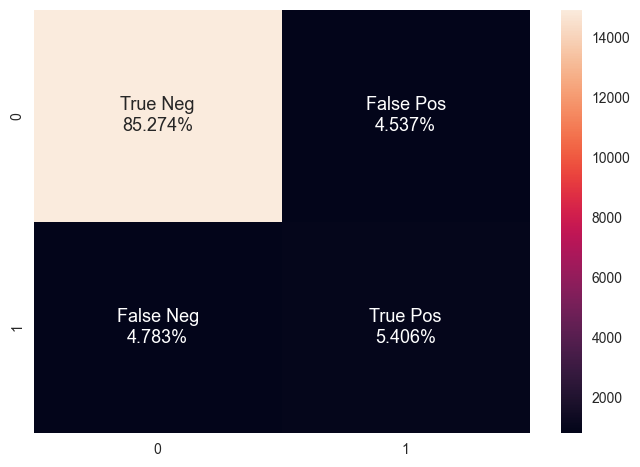

In [31]:
groups = ['True Neg','False Pos','False Neg','True Pos']
percentage_values = ['{0:.3%}'.format(value) for value in cm.flatten() / np.sum(cm)]

labels = [f"{a}\n{b}" for a, b in zip(groups, percentage_values)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, annot_kws={'fontsize':13}, fmt='');

In [46]:
# recall parece ser mais relevante para o caso que estamos lidando, pois nesse caso é melhor prevenir que possíveis cancelamentos ocorram
# porém as duas métricas são importantes

In [32]:
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     15717
           1       0.54      0.53      0.54      1783

    accuracy                           0.91     17500
   macro avg       0.75      0.74      0.74     17500
weighted avg       0.91      0.91      0.91     17500



Apesar do alto valor de acurácia, o algoritmo não consegue prever muito bem os casos em que há possibilidade de churn.

<h5> 3.2 K-Nearest Neighbor</h5>

In [33]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('Há', y_train.shape[0], 'dados de treino e', y_test.shape[0], 'dados de teste do total de',y.shape[0],'dados.')

Há 52499 dados de treino e 17500 dados de teste do total de 69999 dados.


In [34]:
#Nesse modelo vamos normalizar os dados para o KNN não ser afedado pela escala.
scaler = StandardScaler()
X_train_default = scaler.fit_transform(X_train)
X_test_default= scaler.transform(X_test) 

Analizar o melhor hiperparâmetro para o modelo KNN.

In [35]:
#validação cruzada
kf = KFold(n_splits = 5, 
           shuffle = True, 
           random_state = 12
          )

In [36]:
def knn_score(X_train,y_train):
    scores_para_df_standard = []

    for i in range(1, 21):
        model = KNeighborsClassifier(n_neighbors = i)

        cv_scores = cross_val_score(model, 
                                    X_train, 
                                    y_train, 
                                    cv = kf
                                )
        
        dict_row_score = {'score_medio':np.mean(cv_scores),
                        'score_std':np.std(cv_scores), 'n_neighbors' : i
                        }
        
        scores_para_df_standard.append(dict_row_score)
        
    return scores_para_df_standard

In [37]:
scores_para_df = []
scores_para_df = knn_score(X_train_default,y_train)
df_scores = pd.DataFrame(scores_para_df)
df_scores

,score_medio,score_std,n_neighbors
0,0.886550,0.004194,1
1,0.908494,0.001697,2
2,0.905827,0.002782,3
3,0.911008,0.002020,4
4,0.910379,0.003139,5
5,0.912322,0.002320,6
6,0.911217,0.003285,7
7,0.912398,0.003058,8
8,0.911922,0.003515,9
9,0.913484,0.002288,10


In [38]:
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
df_scores.head()

,score_medio,score_std,n_neighbors,limite_inferior,limite_superior
0,0.886550,0.004194,1,0.882356,0.890744
1,0.908494,0.001697,2,0.906797,0.910190
2,0.905827,0.002782,3,0.903045,0.908609
3,0.911008,0.002020,4,0.908988,0.913028
4,0.910379,0.003139,5,0.907240,0.913518


O melhor hiperparâmetro K.

In [39]:
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(), 
                                'n_neighbors'].values[0]
best_k

20

Trabalhando com o modelo KNN e o melhor hiperparâmetro.

In [40]:
def knn_best(X_train, y_train,X_test):
    knn = KNeighborsClassifier(n_neighbors = best_k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return y_pred


In [41]:
y_train_best_pred = knn_best(X_train_default, y_train, X_train_default)
y_test_best_pred = knn_best(X_train_default, y_train, X_test_default)

acc_train_model= accuracy_score(y_train, y_train_best_pred).round(5)
acc_test_model= accuracy_score(y_test, y_test_best_pred).round(5)

print("No modelo de  K=",best_k,"obtivemos a precisão",acc_train_model,"nos dados de treinamento e",acc_test_model,"nos dados de teste.")

No modelo de  K= 20 obtivemos a precisão 0.9199 nos dados de treinamento e 0.91263 nos dados de teste.


In [42]:
cm_knn = confusion_matrix(y_test, y_test_best_pred)
cm_knn

array([[15435,   282],
       [ 1247,   536]], dtype=int64)

<AxesSubplot: >

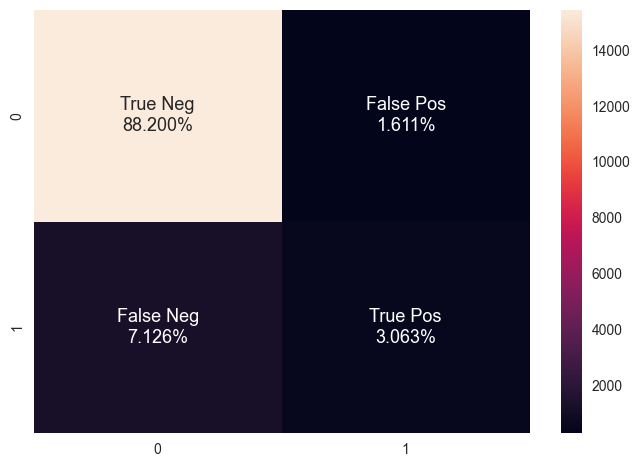

In [43]:
groups = ['True Neg','False Pos','False Neg','True Pos']
percentage_values = ['{0:.3%}'.format(value) for value in cm_knn.flatten() / np.sum(cm_knn)]

labels = [f"{a}\n{b}" for a, b in zip(groups, percentage_values)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_knn, annot=labels, annot_kws={'fontsize':13}, fmt='')

<h4>4. Pipeline com Pycaret</h4>

In [44]:
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [45]:
s = setup(train, target = 'churn_probability')
best = compare_models()
evaluate_model(best)
predictions = predict_model(best, data = test)
save_model(best, '../models/best_pipeline_not_equilibrium')

,Description,Value
0,Session id,8192
1,Target,churn_probability
2,Target type,Binary
3,Original data shape,"(55999, 149)"
4,Transformed data shape,"(55999, 140)"
5,Transformed train set shape,"(39199, 140)"
6,Transformed test set shape,"(16800, 140)"
7,Numeric features,148
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9417,0.9363,0.6265,0.7601,0.6866,0.6549,0.6587,18.9820
rf,Random Forest Classifier,0.9416,0.9299,0.5829,0.7891,0.6704,0.6392,0.6480,5.4150
lightgbm,Light Gradient Boosting Machine,0.9416,0.9396,0.6350,0.7540,0.6892,0.6572,0.6603,1.2980
ada,Ada Boost Classifier,0.9389,0.9288,0.6042,0.7482,0.6684,0.6352,0.6396,4.8700
et,Extra Trees Classifier,0.9379,0.9207,0.5164,0.8053,0.6289,0.5968,0.6146,3.0290
lr,Logistic Regression,0.9298,0.8956,0.4413,0.7734,0.5614,0.5264,0.5512,4.9410
ridge,Ridge Classifier,0.9286,0.0000,0.4128,0.7847,0.5406,0.5060,0.5369,0.1440
lda,Linear Discriminant Analysis,0.9280,0.8945,0.4218,0.7675,0.5440,0.5085,0.5357,0.8150
knn,K Neighbors Classifier,0.9140,0.8173,0.3705,0.6340,0.4674,0.4242,0.4425,0.9760
dt,Decision Tree Classifier,0.9069,0.7511,0.5554,0.5423,0.5487,0.4968,0.4969,1.5510


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9439,0.9475,0.6561,0.7592,0.7039,0.6731,0.6753


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\LBEIRA~1.SOU\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['loc_og_t2o_mou', 'std_og_t2o_mou',
                                              'loc_ic_t2o_mou', 'arpu_6',
                                              'arpu_7', 'arpu_8', 'onnet_mou_6',
                                              'onnet_mou_7', 'onnet_mou_8',
                                              'offnet_mou_6', 'offnet_mou_7',
                                              'offnet_mou_8', 'roam_ic_mou_6',
                                              'roam_ic_mou_7', 'ro...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                                             max_depth=3, max_features=None,
                                             ma

Notamos um Recall muito baixo e analizamos um desequilíbrio de classe. Então vamos reajustar o modelo.

In [46]:
print('Dados:\n', y.value_counts(normalize = True).round(10),'\n')
print('Dados de treino:\n', y_train.value_counts(normalize = True).round(10),'\n')
print('Dados de teste:\n', y_test.value_counts(normalize = True).round(10))

Dados:
 0    0.898113
1    0.101887
Name: churn_probability, dtype: float64 

Dados de treino:
 0    0.898112
1    0.101888
Name: churn_probability, dtype: float64 

Dados de teste:
 0    0.898114
1    0.101886
Name: churn_probability, dtype: float64


<h4> 5. Reajuste dos Modelos</h4>

<h5> 5.1 Decision Tree</h5>

In [47]:
# definir parâmetros para o Grid Search
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(2,10)
}

In [48]:
# encontrar os melhores parâmetros para o modelo
grid_tree = GridSearchCV(model_tree,
                        param_grid=param_grid_tree)

grid_tree.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=None,
                                              splitter='best'),
             n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'splitter': ['best', 'random']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
grid_tree.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

In [50]:
grid_tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [51]:
# testar com os parâmetros encontrados
# {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

model_tree_tuned = DecisionTreeClassifier(criterion='gini', max_depth=4, splitter='best')
model_tree_tuned.fit(X_train, y_train)
predictions_tree_tuned = model_tree_tuned.predict(X_test)

In [52]:
accuracy_score(y_test, predictions_tree_tuned)

0.9409142857142857

In [53]:
cm = confusion_matrix(y_test, predictions_tree_tuned)
cm

array([[15425,   292],
       [  742,  1041]], dtype=int64)

<AxesSubplot: >

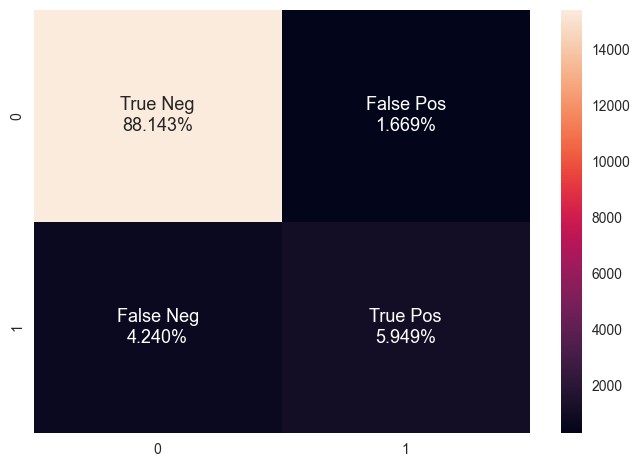

In [54]:
groups = ['True Neg','False Pos','False Neg','True Pos']
percentage_values = ['{0:.3%}'.format(value) for value in cm.flatten() / np.sum(cm)]

labels = [f"{a}\n{b}" for a, b in zip(groups, percentage_values)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, annot_kws={'fontsize':13}, fmt='')

In [55]:
print(classification_report(y_test, predictions_tree_tuned))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     15717
           1       0.78      0.58      0.67      1783

    accuracy                           0.94     17500
   macro avg       0.87      0.78      0.82     17500
weighted avg       0.94      0.94      0.94     17500



<h4>6. Resampling</h4>

Tecnica de reamostragem para equilibrar as classes.

<h5>6.1 OverSampling</h5>

duplicar a classe minoritária

In [56]:
oversample = RandomOverSampler(random_state=0)
X_resample, y_resample = oversample.fit_resample(X, y)

<h5>6.2 UnderSampling</h5>

excluir classe majoritária

In [57]:
undersample = RandomUnderSampler(random_state=0)
X_resample, y_resample = undersample.fit_resample(X_resample, y_resample)

<h4>7. Modelo com a reamostragem<h4>

<h5>7.1 Dividir entre treino e teste</h5>

In [58]:
X_train_resample, X_test_resample, y_train_resample, y_test_resample = train_test_split(X_resample, y_resample, stratify=y_resample, random_state=42)

In [59]:
train_resample = X_train_resample.copy()
train_resample['churn_probability'] = y_train_resample

test_resample = X_test_resample.copy()
test_resample['churn_probability'] = y_test_resample

In [60]:
train_resample

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
102322,0.0,0.0,0.0,632.937,390.390,504.390,90.29,22.48,22.98,406.99,...,0,0,0.0,0.0,0.0,627,4.91,0.00,0.00,1
48972,0.0,0.0,0.0,255.621,243.132,307.128,122.31,41.43,20.28,237.23,...,0,0,0.0,0.0,0.0,642,0.00,0.00,0.00,0
44281,0.0,0.0,0.0,524.344,731.671,198.654,296.48,178.38,199.99,581.81,...,0,0,0.0,0.0,0.0,432,0.00,0.00,0.00,0
36355,0.0,0.0,0.0,162.763,123.639,62.063,0.43,0.00,1.14,45.29,...,0,0,0.0,0.0,0.0,1266,0.00,0.00,0.00,0
103865,0.0,0.0,0.0,121.980,96.209,0.000,433.76,394.79,32.10,75.69,...,0,0,0.0,0.0,0.0,221,0.00,0.00,136.58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34702,0.0,0.0,0.0,240.723,308.653,0.000,103.83,114.16,0.00,482.58,...,0,0,0.0,0.0,0.0,321,0.00,0.00,0.00,0
36773,0.0,0.0,0.0,712.474,454.585,596.149,294.29,233.04,338.09,762.23,...,0,0,0.0,0.0,0.0,702,0.00,0.00,0.00,0
56889,0.0,0.0,0.0,311.784,166.488,19.864,34.18,2.84,5.14,333.86,...,0,0,0.0,0.0,0.0,475,0.00,0.00,0.00,0
34286,0.0,0.0,0.0,2326.757,594.310,829.604,13.89,11.18,9.54,75.86,...,0,0,1.0,0.0,0.0,1321,2317.36,2573.98,1118.16,0


In [61]:
test_resample

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
113254,0.0,0.0,0.0,147.565,78.288,0.000,0.00,0.00,32.10,20.01,...,0,0,1.0,1.0,0.0,348,0.00,0.00,0.00,1
21372,0.0,0.0,0.0,370.654,179.084,185.730,4.78,0.00,3.53,198.48,...,0,0,0.0,0.0,0.0,3370,0.00,0.00,0.00,0
46352,0.0,0.0,0.0,206.675,44.701,193.798,259.14,35.69,154.34,38.61,...,0,0,0.0,0.0,1.0,612,0.00,0.00,0.00,0
81839,0.0,0.0,0.0,113.666,6.550,0.000,35.49,0.41,0.00,71.06,...,0,0,0.0,0.0,0.0,1154,0.00,0.00,0.00,1
15646,0.0,0.0,0.0,40.942,106.464,70.568,3.34,3.36,0.26,31.36,...,0,0,0.0,0.0,0.0,242,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49343,0.0,0.0,0.0,80.274,168.250,0.000,0.00,0.00,0.00,0.00,...,0,0,0.0,1.0,1.0,402,328.84,502.02,277.22,0
97262,0.0,0.0,0.0,427.724,462.400,0.000,0.00,0.00,0.00,0.00,...,1,0,1.0,1.0,0.0,792,0.00,935.45,0.00,1
102693,0.0,0.0,0.0,307.100,0.000,92.230,7.43,32.28,32.10,144.29,...,0,0,0.0,0.0,0.0,1532,0.00,0.00,0.00,1
25783,0.0,0.0,0.0,420.994,272.923,193.428,82.96,22.68,45.49,409.04,...,0,0,0.0,0.0,0.0,980,0.00,0.00,0.00,0


Mostrar dados equilibrados.

In [62]:
print('Dados:\n', y_resample.value_counts(normalize = True).round(10),'\n')
print('Dados de treino:\n', y_train_resample.value_counts(normalize = True).round(10),'\n')
print('Dados de teste:\n', y_test_resample.value_counts(normalize = True).round(10))

Dados:
 0    0.5
1    0.5
Name: churn_probability, dtype: float64 

Dados de treino:
 1    0.5
0    0.5
Name: churn_probability, dtype: float64 

Dados de teste:
 1    0.5
0    0.5
Name: churn_probability, dtype: float64


<h5>7.2 Pipeline de modelos</h5>

In [63]:
df_resample = X_resample.copy()
df_resample['churn_probability'] = y_resample
df_resample

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,...,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,...,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,...,0,0,0.0,0.0,0.0,882,0.0,0.0,0.0,0
3,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,68.76,...,0,0,0.0,0.0,0.0,982,0.0,0.0,0.0,0
4,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125729,0.0,0.0,0.0,168.772,43.859,22.612,18.04,2.66,1.00,176.64,...,0,0,0.0,0.0,0.0,202,0.0,0.0,0.0,1
125730,0.0,0.0,0.0,201.379,100.108,61.769,31.28,18.39,6.86,145.48,...,0,0,0.0,0.0,0.0,560,0.0,0.0,0.0,1
125731,0.0,0.0,0.0,282.481,401.395,373.139,37.18,33.38,16.09,157.19,...,0,0,0.0,0.0,0.0,402,0.0,0.0,0.0,1
125732,0.0,0.0,0.0,192.472,238.936,8.200,18.13,18.48,0.00,204.74,...,0,0,0.0,0.0,0.0,1135,0.0,0.0,0.0,1


<b>session_id</b> é igual ao <b>random_state</b>.</br>
<b>data_split_stratify</b> é como o <b>stratify</b> para coluna target.</br>
<b>train_size</b> proporção que sera usado para treino e validação, sendo o default 0.7.</br>

In [64]:
s = setup(df_resample, target = 'churn_probability', data_split_stratify=True, session_id=42, train_size= 0.7)

,Description,Value
0,Session id,42
1,Target,churn_probability
2,Target type,Binary
3,Original data shape,"(125734, 149)"
4,Transformed data shape,"(125734, 140)"
5,Transformed train set shape,"(88013, 140)"
6,Transformed test set shape,"(37721, 140)"
7,Numeric features,148
8,Preprocess,True
9,Imputation type,simple


verificando o melhor modelo e ordernando pelo estimador

In [65]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9893,0.9998,0.9988,0.9801,0.9894,0.9785,0.9787,8.7660
rf,Random Forest Classifier,0.9845,0.9993,0.9990,0.9708,0.9847,0.9690,0.9694,12.0750
dt,Decision Tree Classifier,0.9649,0.9649,0.9987,0.9355,0.9661,0.9299,0.9320,3.0370
lightgbm,Light Gradient Boosting Machine,0.9181,0.9724,0.9234,0.9137,0.9185,0.8362,0.8362,2.0380
knn,K Neighbors Classifier,0.9030,0.9537,0.9782,0.8503,0.9098,0.8059,0.8152,6.4920
gbc,Gradient Boosting Classifier,0.8866,0.9507,0.8694,0.9003,0.8846,0.7731,0.7736,40.5880
ada,Ada Boost Classifier,0.8670,0.9370,0.8435,0.8852,0.8638,0.7341,0.7349,10.4670
ridge,Ridge Classifier,0.8449,0.0000,0.8090,0.8716,0.8391,0.6897,0.6915,0.4960
lr,Logistic Regression,0.8427,0.9070,0.8089,0.8675,0.8371,0.6853,0.6869,8.4590
lda,Linear Discriminant Analysis,0.8382,0.9060,0.7937,0.8712,0.8306,0.6764,0.6791,2.0010


In [66]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False)

In [67]:
best_recall = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9845,0.9993,0.9990,0.9708,0.9847,0.9690,0.9694,12.4940
et,Extra Trees Classifier,0.9893,0.9998,0.9988,0.9801,0.9894,0.9785,0.9787,9.1980
dt,Decision Tree Classifier,0.9649,0.9649,0.9987,0.9355,0.9661,0.9299,0.9320,4.1060
knn,K Neighbors Classifier,0.9030,0.9537,0.9782,0.8503,0.9098,0.8059,0.8152,7.0660
lightgbm,Light Gradient Boosting Machine,0.9181,0.9724,0.9234,0.9137,0.9185,0.8362,0.8362,2.2080
qda,Quadratic Discriminant Analysis,0.7082,0.8682,0.9118,0.6480,0.7576,0.4164,0.4560,1.6290
nb,Naive Bayes,0.6604,0.7193,0.9087,0.6072,0.7279,0.3208,0.3695,0.5410
gbc,Gradient Boosting Classifier,0.8866,0.9507,0.8694,0.9003,0.8846,0.7731,0.7736,41.8260
ada,Ada Boost Classifier,0.8670,0.9370,0.8435,0.8852,0.8638,0.7341,0.7349,9.1020
ridge,Ridge Classifier,0.8449,0.0000,0.8090,0.8716,0.8391,0.6897,0.6915,0.5370


In [68]:
best_recall

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [69]:
best_f1 = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9893,0.9998,0.9988,0.9801,0.9894,0.9785,0.9787,8.7160
rf,Random Forest Classifier,0.9845,0.9993,0.9990,0.9708,0.9847,0.9690,0.9694,11.2870
dt,Decision Tree Classifier,0.9649,0.9649,0.9987,0.9355,0.9661,0.9299,0.9320,3.3180
lightgbm,Light Gradient Boosting Machine,0.9181,0.9724,0.9234,0.9137,0.9185,0.8362,0.8362,2.2920
knn,K Neighbors Classifier,0.9030,0.9537,0.9782,0.8503,0.9098,0.8059,0.8152,7.1430
gbc,Gradient Boosting Classifier,0.8866,0.9507,0.8694,0.9003,0.8846,0.7731,0.7736,39.0180
ada,Ada Boost Classifier,0.8670,0.9370,0.8435,0.8852,0.8638,0.7341,0.7349,9.9580
ridge,Ridge Classifier,0.8449,0.0000,0.8090,0.8716,0.8391,0.6897,0.6915,0.4910
lr,Logistic Regression,0.8427,0.9070,0.8089,0.8675,0.8371,0.6853,0.6869,8.6740
lda,Linear Discriminant Analysis,0.8382,0.9060,0.7937,0.8712,0.8306,0.6764,0.6791,1.8070


In [70]:
best_f1

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False)

Analizando modelos

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

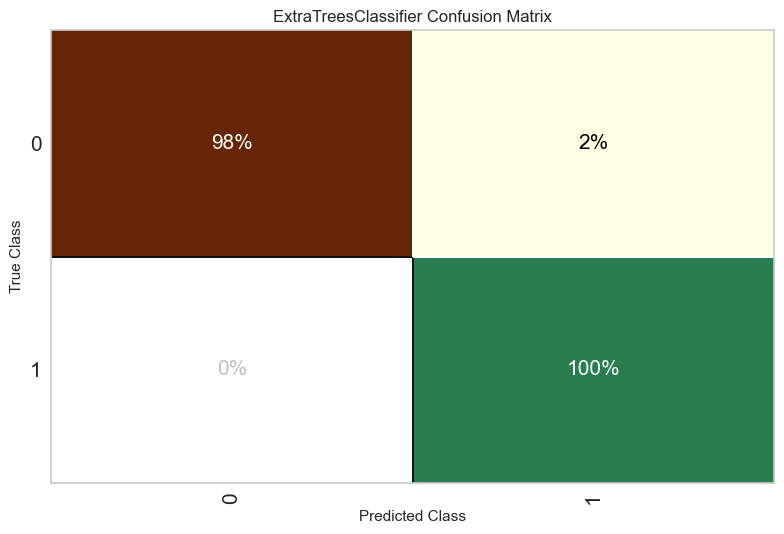

In [71]:
evaluate_model(best_model)
plot_model(best_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True, 'cmap':'YlOrBr'})

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

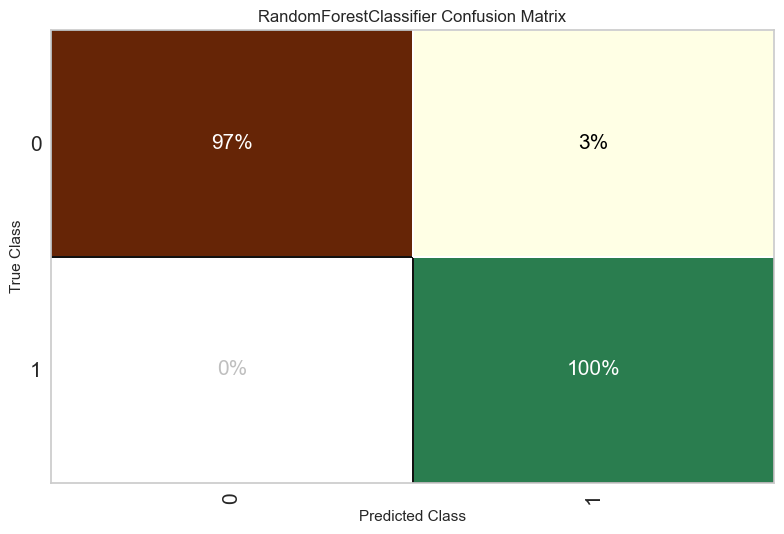

In [72]:
evaluate_model(best_recall)
plot_model(best_recall, plot = 'confusion_matrix', plot_kwargs = {'percent' : True, 'cmap':'YlOrBr'})

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

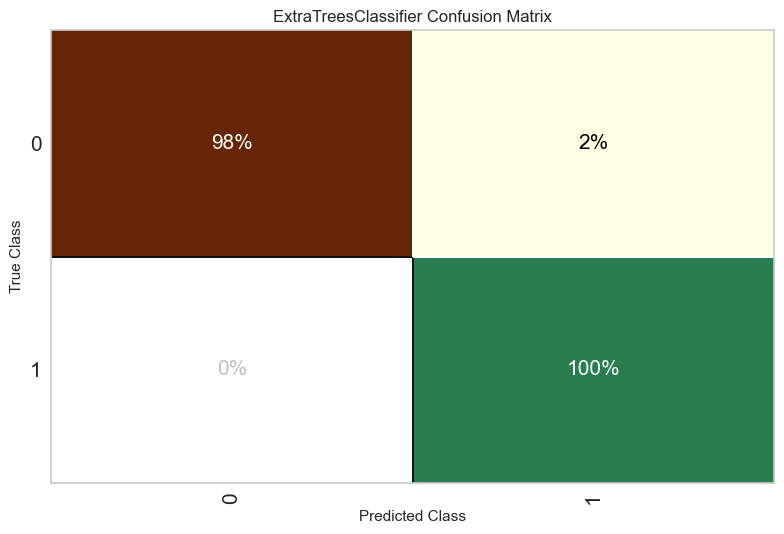

In [73]:
evaluate_model(best_f1)
plot_model(best_f1, plot = 'confusion_matrix', plot_kwargs = {'percent' : True, 'cmap':'YlOrBr'})

Previsão baseada no conjunto de teste criado no setup. Para utilizar outro conjunto de teste é some alterar o parametro dados.

In [74]:
get_config('X_train')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,116.605003,283.920013,636.940002,104.709999,97.040001,311.309998,46.889999,296.339996,818.210022,36.880001,...,0.0,0.0,0.0,0.0,0.0,0.0,544.0,0.000000,0.000000,0.000000
1,278.759003,335.709015,528.583984,0.280000,4.340000,4.910000,17.110001,59.110001,33.130001,0.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,533.0,0.000000,1067.949951,895.859985
2,108.613998,170.742996,10.322000,7.330000,70.779999,5.590000,63.360001,71.940002,0.350000,6.830000,...,0.0,0.0,0.0,0.0,0.0,0.0,2132.0,0.000000,0.000000,0.000000
3,583.226990,327.514008,0.000000,1356.739990,784.309998,32.099998,16.510000,8.180000,91.800003,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,399.0,0.000000,0.000000,42.889999
4,626.221008,615.648010,0.000000,287.059998,65.680000,32.099998,804.780029,259.929993,91.800003,50.330002,...,0.0,0.0,0.0,1.0,0.0,0.0,1762.0,0.000000,127.610001,597.070007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88008,14.303000,133.632996,32.615002,2.460000,154.630005,24.510000,0.700000,8.410000,6.160000,8.340000,...,0.0,0.0,0.0,0.0,0.0,0.0,1094.0,0.000000,0.000000,0.000000
88009,61.700001,131.449997,297.690002,0.000000,1.200000,0.000000,2.100000,0.700000,5.890000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1860.0,0.000000,0.000000,0.000000
88010,87.473000,48.500999,85.902000,5.140000,6.480000,10.690000,44.490002,19.690001,45.360001,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,539.0,0.000000,0.000000,0.000000
88011,2250.937012,1490.187012,2212.118896,363.130005,447.589996,293.260010,1954.439941,1396.630005,1444.209961,0.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1650.0,1581.880005,1100.729980,2082.040039


In [75]:
get_config('X_test')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
88013,221.151001,198.238998,195.994995,22.379999,7.910000,0.500000,23.730000,8.510000,38.430000,0.00,...,0.0,0.0,0.0,1.0,1.0,1.0,1371.0,306.059998,243.630005,512.22998
88014,279.360992,362.114990,31.000000,505.730011,779.039978,29.059999,37.439999,62.459999,27.080000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,356.0,0.000000,0.000000,0.00000
88015,100.007004,38.330002,94.095001,0.000000,0.000000,0.000000,4.580000,11.040000,0.410000,0.00,...,0.0,0.0,0.0,1.0,1.0,1.0,220.0,0.000000,0.000000,0.00000
88016,365.532990,287.687988,280.134003,582.789978,524.090027,534.039978,20.530001,28.110001,28.730000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,342.0,0.000000,0.000000,0.00000
88017,266.700989,264.408997,0.100000,472.980011,535.979980,0.000000,47.779999,10.060000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,238.0,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125729,39.855999,65.768997,64.948997,0.000000,0.000000,0.000000,14.110000,0.000000,2.530000,0.00,...,0.0,1.0,0.0,1.0,1.0,1.0,229.0,0.000000,0.000000,0.00000
125730,68.758003,123.134003,186.996002,0.000000,0.300000,3.790000,41.630001,105.430000,131.759995,8.38,...,0.0,0.0,0.0,0.0,0.0,0.0,987.0,0.000000,0.000000,0.00000
125731,1280.672974,316.247986,-5.000000,264.640015,147.529999,32.099998,873.859985,514.109985,91.800003,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.000000,0.000000,0.00000
125732,5.010000,84.834000,46.290001,0.000000,0.000000,1.500000,5.230000,60.810001,28.740000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,970.0,0.000000,0.000000,0.00000


In [76]:
predictions_best_model = predict_model(best_model)
save_model(best_model, '../models/best_pipeline')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9912,0.9997,0.9992,0.9835,0.9913,0.9824,0.9825


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\LBEIRA~1.SOU\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['loc_og_t2o_mou', 'std_og_t2o_mou',
                                              'loc_ic_t2o_mou', 'arpu_6',
                                              'arpu_7', 'arpu_8', 'onnet_mou_6',
                                              'onnet_mou_7', 'onnet_mou_8',
                                              'offnet_mou_6', 'offnet_mou_7',
                                              'offnet_mou_8', 'roam_ic_mou_6',
                                              'roam_ic_mou_7', 'ro...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_

In [77]:
predictions_best_recall = predict_model(best_recall)
save_model(best_recall, '../models/best_pipeline_recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9868,0.9995,0.9992,0.9750,0.9869,0.9735,0.9738


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\LBEIRA~1.SOU\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['loc_og_t2o_mou', 'std_og_t2o_mou',
                                              'loc_ic_t2o_mou', 'arpu_6',
                                              'arpu_7', 'arpu_8', 'onnet_mou_6',
                                              'onnet_mou_7', 'onnet_mou_8',
                                              'offnet_mou_6', 'offnet_mou_7',
                                              'offnet_mou_8', 'roam_ic_mou_6',
                                              'roam_ic_mou_7', 'ro...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_nodes=Non

In [78]:
predictions_best_f1 = predict_model(best_f1)
save_model(best_f1, '../models/best_pipeline_f1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9912,0.9997,0.9992,0.9835,0.9913,0.9824,0.9825


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\LBEIRA~1.SOU\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['loc_og_t2o_mou', 'std_og_t2o_mou',
                                              'loc_ic_t2o_mou', 'arpu_6',
                                              'arpu_7', 'arpu_8', 'onnet_mou_6',
                                              'onnet_mou_7', 'onnet_mou_8',
                                              'offnet_mou_6', 'offnet_mou_7',
                                              'offnet_mou_8', 'roam_ic_mou_6',
                                              'roam_ic_mou_7', 'ro...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_

<h5>7.3 Os melhores modelos</h5>

<b>7.3.1 Extra Trees Classifier</b>

In [79]:
print('Dados:\n', y_resample.value_counts(normalize = True).round(10),'\n')
print('Dados de treino:\n', y_train_resample.value_counts(normalize = True).round(10),'\n')
print('Dados de teste:\n', y_test_resample.value_counts(normalize = True).round(10))

Dados:
 0    0.5
1    0.5
Name: churn_probability, dtype: float64 

Dados de treino:
 1    0.5
0    0.5
Name: churn_probability, dtype: float64 

Dados de teste:
 1    0.5
0    0.5
Name: churn_probability, dtype: float64


In [80]:
etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=42)
print(etc)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False)


In [81]:
etc.fit(X_train_resample, y_train_resample)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False)

In [82]:
score = etc.score(X_train_resample, y_train_resample)
print("Score:", score)

Score: 1.0


In [83]:
cv_scores = cross_val_score(etc, X_train_resample, y_train_resample, cv=5)
print("CV average: ", cv_scores)

CV average:  [0.98817603 0.9902439  0.9892895  0.98812301 0.98870626]


In [84]:
ypred = etc.predict(X_test_resample)
cm2 = confusion_matrix(y_test_resample, ypred)

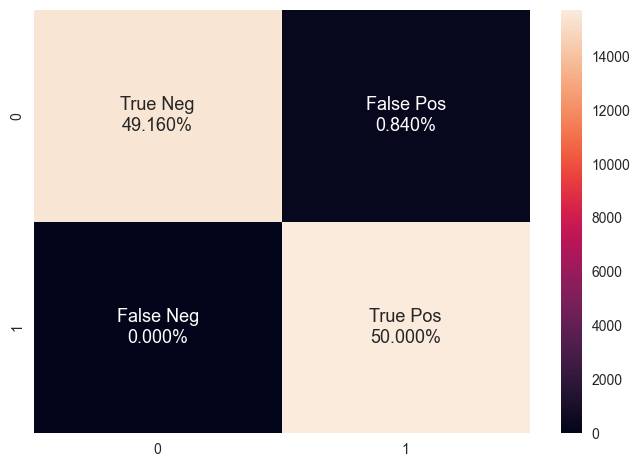

In [85]:
groups = ['True Neg','False Pos','False Neg','True Pos']
percentage_values = ['{0:.3%}'.format(value) for value in cm2.flatten() / np.sum(cm2)]

labels = [f"{a}\n{b}" for a, b in zip(groups, percentage_values)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm2, annot=labels, annot_kws={'fontsize':13}, fmt='');

In [86]:
print(classification_report(y_test_resample, ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15717
           1       0.98      1.00      0.99     15717

    accuracy                           0.99     31434
   macro avg       0.99      0.99      0.99     31434
weighted avg       0.99      0.99      0.99     31434



In [87]:
def generate_feature_importance(model, X, y):
    return permutation_importance(model, X, y, n_repeats=10, random_state=0)

def info_feature_importance(model, X_test, y_test):
    feature_importance = generate_feature_importance(model, X_test, y_test)

    column_names = X_test.columns
    result = pd.Series(feature_importance.importances_mean, index=column_names)
    print(result.sort_values(ascending=False))

Features de maior importância para o modelo Extra Trees

In [88]:
info_feature_importance(etc, X_test_resample, y_test_resample)

fb_user_8           0.081294
loc_ic_mou_8        0.016450
loc_ic_t2m_mou_8    0.014526
aon                 0.008176
spl_ic_mou_8        0.005554
                      ...   
loc_ic_t2f_mou_8   -0.000827
offnet_mou_8       -0.000958
std_ic_t2m_mou_8   -0.001063
std_ic_mou_8       -0.001110
loc_og_t2t_mou_8   -0.001648
Length: 148, dtype: float64


<b>7.3.2 Random Forest Classifier</b>

In [89]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42, max_features='sqrt')

In [90]:
rfc.fit(X_train_resample, y_train_resample)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [91]:
score_train = rfc.score(X_train_resample, y_train_resample)
score_test = rfc.score(X_test_resample, y_test_resample)
print(f"Score treino: {score_train}\nScore teste: {score_test}")

Score treino: 1.0
Score teste: 0.987052236431889


In [92]:
cv_scores = cross_val_score(rfc, X_test_resample, y_test_resample, cv=5)
print("CV average: ", cv_scores)

CV average:  [0.9533959  0.9533959  0.95228249 0.95180531 0.95402482]


In [93]:
predictions_rfc = rfc.predict(X_test_resample)
cm_rfc = confusion_matrix(y_test_resample, predictions_rfc)
cm_rfc

array([[15310,   407],
       [    0, 15717]], dtype=int64)

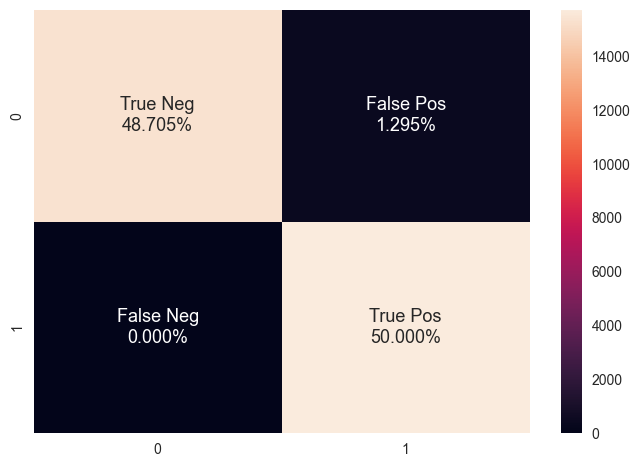

In [94]:
groups = ['True Neg','False Pos','False Neg','True Pos']
percentage_values = ['{0:.3%}'.format(value) for value in cm_rfc.flatten() / np.sum(cm_rfc)]

labels = [f"{a}\n{b}" for a, b in zip(groups, percentage_values)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_rfc, annot=labels, annot_kws={'fontsize':13}, fmt='');

In [95]:
print(classification_report(y_test_resample, predictions_rfc))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     15717
           1       0.97      1.00      0.99     15717

    accuracy                           0.99     31434
   macro avg       0.99      0.99      0.99     31434
weighted avg       0.99      0.99      0.99     31434



Features de maior importância para o modelo Random Forest

In [96]:
info_feature_importance(rfc, X_test_resample, y_test_resample)

total_ic_mou_8        0.012817
last_day_rch_amt_8    0.007326
roam_og_mou_8         0.002415
fb_user_8             0.000242
og_others_6           0.000073
                        ...   
loc_og_mou_8         -0.001266
loc_ic_t2m_mou_8     -0.001533
loc_ic_t2t_mou_8     -0.001645
total_og_mou_8       -0.001699
loc_ic_mou_8         -0.002230
Length: 148, dtype: float64


<h4>8. Criando API</h4>

In [ ]:
create_api(best_model, '../src/server/best_api')

In [ ]:
create_api(best_recall, '../src/server/best_api')

In [ ]:
create_api(best_f1, '../src/server/best_api')